<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%98%D0%B7%D0%BC%D0%B5%D1%80%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D1%8F_%D0%BC%D0%B5%D0%B6%D0%B4%D1%83_%D0%BE%D0%B1%D1%8A%D0%B5%D0%BA%D1%82%D0%B0%D0%BC%D0%B8_%D0%BD%D0%B0_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B8_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;"><b>Измерение расстояния между объектами на изображении с помощью OpenCV</b></h1>

Урок посвящен измерению размера объектов на изображении и вычислению расстояния между объектами .

Референсный объект должен иметь два важных свойства, в том числе:

1. Известные размеры (в дюймах, миллиметрах и т. Д.) объекта.
2. Его можно легко идентифицировать на нашем изображении (по местоположению или внешнему виду ).
Имея такой референсный объект, можно использовать его для вычисления размера объектов на нашем изображении.

### Download the code zip file

Загрузка файлов

In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_27.distance_between_objects.zip
!unzip -qq Lesson_27.distance_between_objects.zip
%cd /content/Lesson_27.distance_between_objects/

--2022-02-04 18:10:08--  http://dataudt.ru/datasets/cv/Lesson_27.distance_between_objects.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13583027 (13M) [application/zip]
Saving to: ‘Lesson_27.distance_between_objects.zip’

Lesson_27.distance_ 100%[===================>]  12.95M  6.84MB/s    in 1.9s    

2022-02-04 18:10:11 (6.84 MB/s) - ‘Lesson_27.distance_between_objects.zip’ saved [13583027/13583027]

/content/Lesson_27.distance_between_objects


## Blog Post Code

Основной блок кода

### Import Packages

Импорт библиотек

In [2]:
# import the necessary packages
# импортируем необходимые библиотеки
from matplotlib import pyplot as plt
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import imutils
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

Функция отображения изображений в Jupyter Notebooks и Google Colab

In [3]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
    # конвертируем изображение из формата BGR в RGB и отображаем его
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.figure(figsize=(10,10))
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Measuring distance between objects in an image with OpenCV

Измерение расстояния между объектами на изображении с помощью OpenCV

In [4]:
# construct the argument parser and parse the arguments
# создаем парсер аргументов  и начинаем их собирать
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to the input image")
# ap.add_argument("-w", "--width", type=float, required=True,
# 	help="width of the left-most object in the image (in inches)")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
# пока мы используем Jupyter Notebooks мы можем заменить наш парсер
# явными аргументами и значениями
# аргумент width - ширина референсного объекта в мм
args = {
	"image": "/content/Lesson_27.distance_between_objects/images/11.png",
	"width": 23
}

In [5]:
def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

# load the image, convert it to grayscale, and blur it slightly
# загружаем изображение, конвертируем его в оттенки серого, слегка размываем
image = cv2.imread(args["image"])
image = imutils.resize(image, width=600)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)

# perform edge detection, then perform a dilation + erosion to
# close gaps in between object edges
# выполняем обнаружение краев, затем выполняем дилатацию + эрозию, чтобы
# закрыть зазоры между краями объекта
edged = cv2.Canny(gray, 30, 150)
edged = cv2.dilate(edged, None, iterations=5)
edged = cv2.erode(edged, None, iterations=2)

# find contours in the edge map
# находим контуры на изображении
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# sort the contours from left-to-right and, then initialize the
# distance colors and reference object
# сортируем контуры слева направо и инициализируем
# цвета расстояний и референсный объект
(cnts, _) = contours.sort_contours(cnts)
colors = ((0, 0, 255), (240, 0, 159), (0, 165, 255), (255, 255, 0),
	(255, 0, 255))
refObj = None

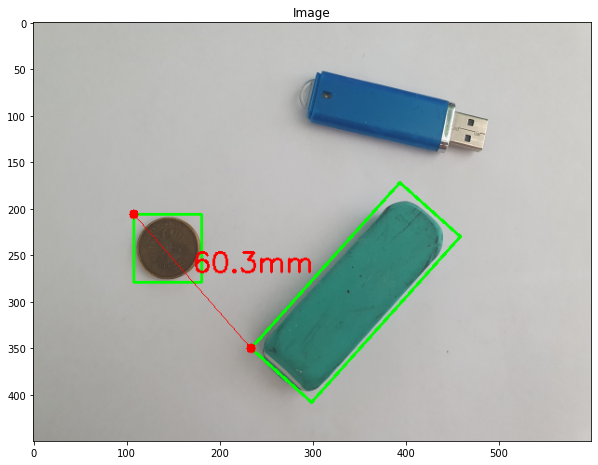

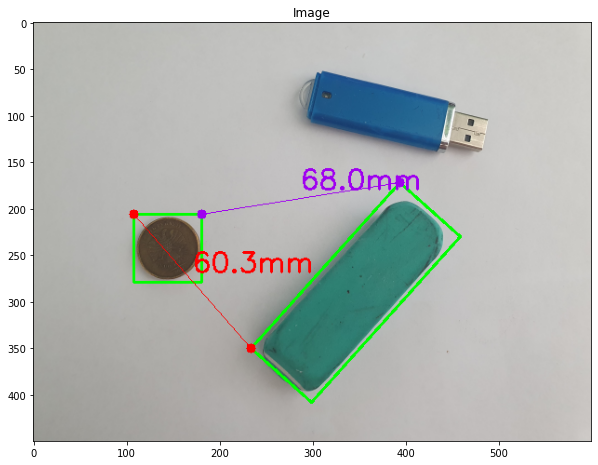

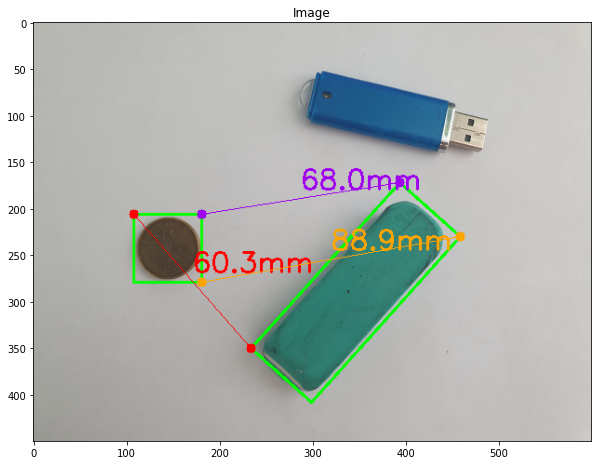

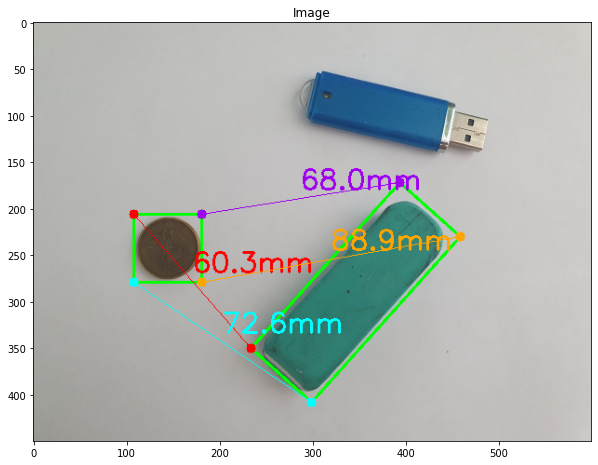

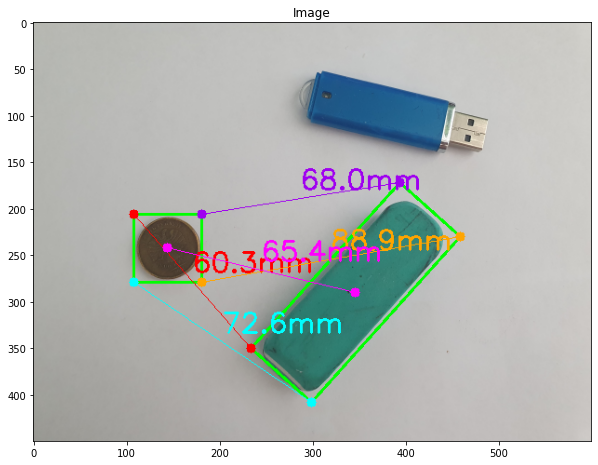

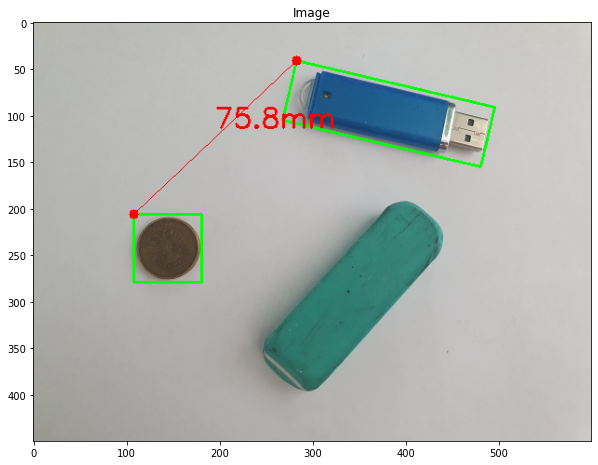

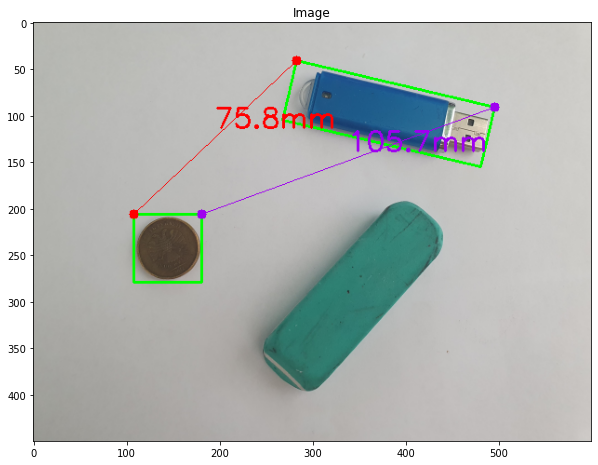

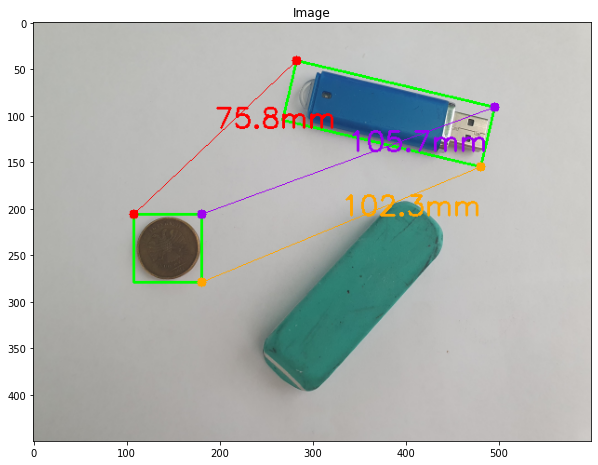

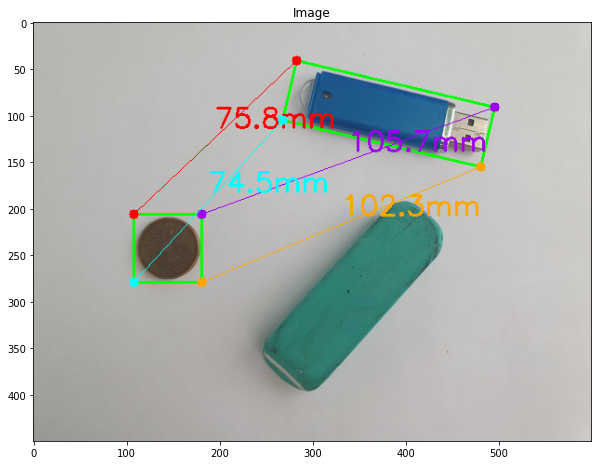

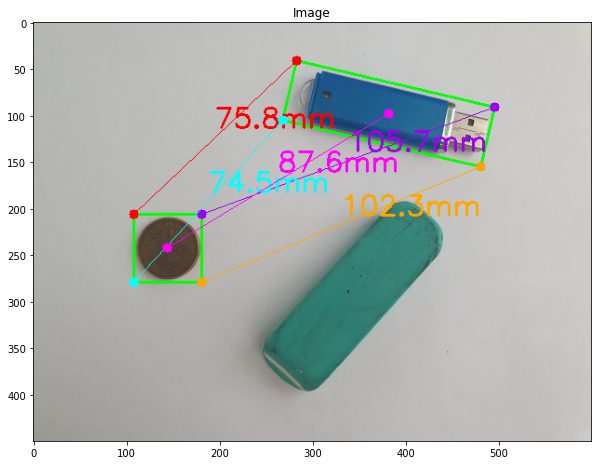

In [6]:
# loop over the contours individually
# перебираем отдельные контуры
for c in cnts:
	# if the contour is not sufficiently large, ignore it
    # если контур недостаточно большой, игнорируем его
	if cv2.contourArea(c) < 1000:
		continue

	# compute the rotated bounding box of the contour
    # вычисляем повернутую ограничивающую рамку контура
	box = cv2.minAreaRect(c)
	box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
	box = np.array(box, dtype="int")

	# order the points in the contour such that they appear
	# in top-left, top-right, bottom-right, and bottom-left
	# order, then draw the outline of the rotated bounding
	# box
    # упорядочиваем точки контура так, чтобы они отображались
	# в верхнем левом, верхнем правом, нижнем правом и нижнем левом
	# углах, затем нарисуем контур рамки
	box = perspective.order_points(box)

	# compute the center of the bounding box
    # вычисляем центр ограничивающей рамки
	cX = np.average(box[:, 0])
	cY = np.average(box[:, 1])

	# if this is the first contour we are examining (i.e.,
	# the left-most contour), we presume this is the
	# reference object
    # если это первый рассматриваемый нами контур (т.е.
	# крайний левый контур), мы предполагаем, что это
	# референсный объект
	if refObj is None:
		# unpack the ordered bounding box, then compute the
		# midpoint between the top-left and top-right points,
		# followed by the midpoint between the top-right and
		# bottom-right
        # распаковываем ограничивающую рамку, затем вычисляем
		# среднюю точку между верхней левой и верхней правой вершинами,
		# , за которыми следует середина между правой верхней и
		# нижней правой вершинами
		(tl, tr, br, bl) = box
		(tlblX, tlblY) = midpoint(tl, bl)
		(trbrX, trbrY) = midpoint(tr, br)

		# compute the Euclidean distance between the midpoints,
		# then construct the reference object
        # вычисляем евклидово расстояние между серединами,
		# затем создаем референсный объект
		D = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
		refObj = (box, (cX, cY), D / args["width"])
		continue

	# draw the contours on the image
    # рисуем контуры на изображении
	orig = image.copy()
	cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
	cv2.drawContours(orig, [refObj[0].astype("int")], -1, (0, 255, 0), 2)

	# stack the reference coordinates and the object coordinates
	# to include the object center
    # складываем референсные координаты и координаты объекта
	# и его центра
	refCoords = np.vstack([refObj[0], refObj[1]])
	objCoords = np.vstack([box, (cX, cY)])

	# loop over the original points
    # перебираем исходные точки
	for ((xA, yA), (xB, yB), color) in zip(refCoords, objCoords, colors):
		# draw circles corresponding to the current points and
		# connect them with a line
        # рисуем круги, соответствующие текущим точкам и
		# соединяем их линией
		cv2.circle(orig, (int(xA), int(yA)), 5, color, -1)
		cv2.circle(orig, (int(xB), int(yB)), 5, color, -1)
		cv2.line(orig, (int(xA), int(yA)), (int(xB), int(yB)),
			color, 1)

		# compute the Euclidean distance between the coordinates,
		# and then convert the distance in pixels to distance in
		# units
        # вычисляем евклидово расстояние между координатами,
		# а затем преобразоваем расстояние в пикселях в расстояние в
		# единицах измерения
		D = dist.euclidean((xA, yA), (xB, yB)) / refObj[2]
		(mX, mY) = midpoint((xA, yA), (xB, yB))
		cv2.putText(orig, "{:.1f}mm".format(D), (int(mX), int(mY - 10)),
			cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

		# show the output image
        # показываем выходное изображение
		plt_imshow("Image", orig)